In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("kddcup_corrected_subset.csv", index_col=None)

In [9]:
df.head(5)

,duration,"""protocol_type""","""flag""","""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""",...,"""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate""",label
0,0,tcp,SF,223,185,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
1,0,tcp,SF,230,260,0,0,0,0,0,...,255,1,0,33,7,33,0,0,0,normal
2,0,tcp,SF,297,13787,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
3,0,tcp,SF,291,3542,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal
4,0,tcp,SF,295,753,0,0,0,0,0,...,255,1,0,1,1,0,0,0,0,normal


In [10]:
df.describe()

,duration,"""src_bytes""","""dst_bytes""","""land""","""wrong_fragment""","""urgent""",hot,"""num_failed_logins""","""logged_in""","""num_compromised""",...,"""dst_host_count""","""dst_host_srv_count""","""dst_host_same_srv_rate""","""dst_host_diff_srv_rate""","""dst_host_same_src_port_rate""","""dst_host_srv_diff_host_rate""",dst_host_serror_rate,"""dst_host_srv_serror_rate""","""dst_host_rerror_rate""","""dst_host_srv_rerror_rate"""
count,41237.000000,41237.000000,4.123700e+04,41237.0,41237.0,41237.0,41237.000000,41237.0,41237.000000,41237.000000,...,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000,41237.000000
mean,15.693552,2448.400078,4.681683e+03,0.0,0.0,0.0,0.053762,0.0,0.990227,0.025923,...,141.463443,246.231685,4.678881,0.169168,2.636516,1.882678,0.350292,0.283071,0.921309,0.797366
std,148.101460,11048.017170,2.774318e+04,0.0,0.0,0.0,0.323289,0.0,0.098374,0.165780,...,104.976288,35.095851,17.926474,2.305841,5.331950,2.186245,4.050813,3.613676,6.389255,5.699760
min,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,219.000000,5.960000e+02,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,31.000000,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,260.000000,1.680000e+03,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,134.000000,255.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,311.000000,4.910000e+03,0.0,0.0,0.0,0.000000,0.0,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,2100.000000,107604.000000,5.203179e+06,0.0,0.0,0.0,7.000000,0.0,1.000000,7.000000,...,255.000000,255.000000,99.000000,99.000000,74.000000,67.000000,98.000000,87.000000,99.000000,89.000000


In [11]:
y = df["label"].values
from collections import Counter
Counter(y)

Counter({'normal': 39247,
         'apache2': 794,
         'phf': 2,
         'back': 1098,
         'neptune': 93,
         'portsweep': 2,
         'saint': 1})

In [12]:
df["duration"].describe()

count    41237.000000
mean        15.693552
std        148.101460
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2100.000000
Name: duration, dtype: float64

In [13]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder()
        df[c] = encodings[c].fit_transform(df[c])

In [14]:
from sklearn.preprocessing import StandardScaler

durations = df['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

count    4.123700e+04
mean     6.574147e-15
std      1.000012e+00
min     -1.059662e-01
25%     -1.059662e-01
50%     -1.059662e-01
75%     -1.059662e-01
max      1.407367e+01
dtype: float64

In [15]:
y = df.pop("label").values
X = df.values

In [16]:
y

array([3, 3, 3, ..., 3, 3, 3])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [18]:
from sklearn.ensemble import IsolationForest
contaminationParameter = 1-sum(y_train==encodings["label"].transform(["normal"])[0])/len(y_train)
print(contaminationParameter)
IF = IsolationForest(n_estimators=100, max_samples=256,contamination=contaminationParameter)

0.048987510609918794


In [19]:
IF.fit(X_train)

C:\Users\vikram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
                contamination=0.048987510609918794, max_features=1.0,
                max_samples=256, n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

In [20]:
scores = IF.decision_function(X_val)
y_pred = IF.predict(X_test)
num_errors = sum(y_pred != y_test)
print('Number of errors: {}'.format(num_errors))
num_correct = sum(y_pred == y_test)
print('Number of correct predictions: {}'.format(num_correct))
print(scores)

C:\Users\vikram\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Number of errors: 8230
Number of correct predictions: 18
[0.17086132 0.17447097 0.15622412 ... 0.18346865 0.15901621 0.16635913]


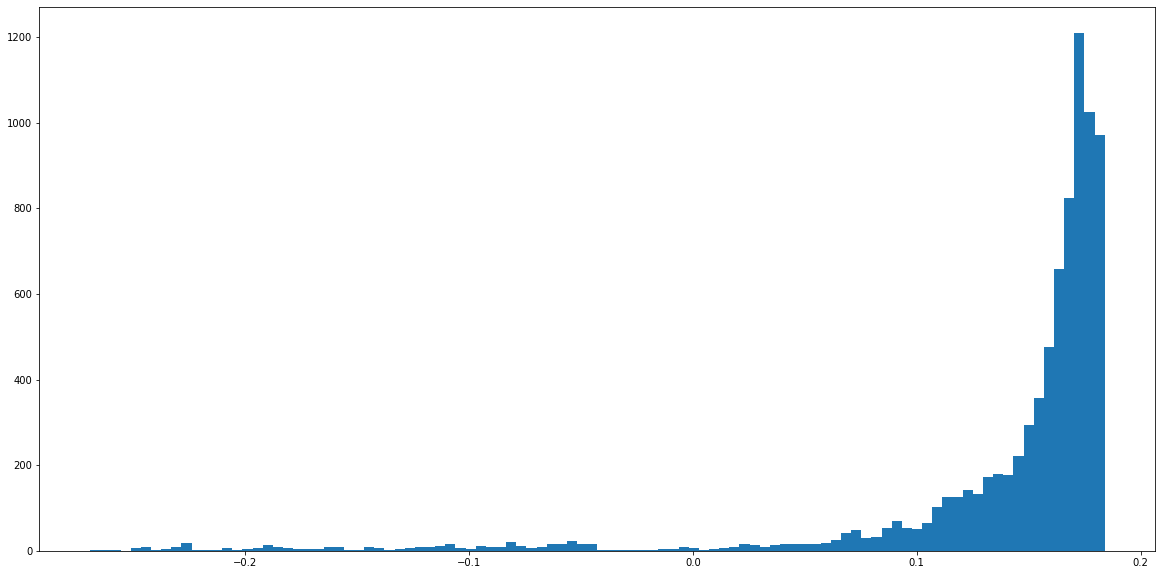

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
_ = plt.hist(scores, bins=100)

In [22]:
cutoff = -0.1

In [23]:
print(Counter(y_val))
print(Counter(y_val[cutoff>scores]))

Counter({3: 7871, 1: 199, 0: 165, 2: 13})
Counter({0: 159, 1: 45, 2: 13, 3: 9})


In [26]:
scores_test = IF.decision_function(X_test)
print(Counter(y_test))
print(Counter(y_test[cutoff>scores_test]))
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Counter({3: 7847, 1: 224, 0: 152, 2: 22, 6: 1, 5: 1, 4: 1})
Counter({0: 147, 1: 53, 2: 22, 3: 5, 6: 1, 5: 1})
[[   0    0    0    0    0    0    0    0]
 [ 151    0    1    0    0    0    0    0]
 [ 206    0   18    0    0    0    0    0]
 [  22    0    0    0    0    0    0    0]
 [  18    0 7829    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]]


In [28]:
from sklearn import svm
outlier_ratio = 0.01
classifier = svm.OneClassSVM(nu=0.99 * outlier_ratio + 0.01, kernel="rbf", gamma=0.1)
classifier.fit(X_train)
y_pred = classifier.predict(X_train)
num_errors = sum(y_pred != y_test)
print('Number of errors: {}'.format(num_errors))
scores = IF.decision_function(X_val)

C:\Users\vikram\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


TypeError: 'bool' object is not iterable

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))
_ = plt.hist(scores, bins=100)